# Classification with Support Vector Machines (SVM)

The support vector machines are a set of supervised learning methods used for classification, regression and outliers detection. We are going to focus in the classification problem. The advantages of SVM are:
 * Effective in high dimensional spaces.
 * Still effective in cases where number of dimensions is greater than the number of samples.
 * Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
 * Versatile: different Kernel functions can be specified for the decision function. (Kernel functions are the way to smooth the boundaries of the found subsets for better fitting.)
 
 And the disadvantage is that it can be easily overfitted.
 
 In the scikit learn library SVC, NuSVC and LinearSVC are classes capable of performing multi-class classification on a dataset.
 We use the SVC function, this function only receives numerical data (cathegorical features must be encode), without missing values and is recommended to normalize. The main parameters are: 
  * C = Penalty parameter C of the error term.
  * kernel = Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable.
  * decision_function_shape = Whether to return a one-vs-rest (‘ovr’) decision function  or the original one-vs-one (‘ovo’) decision function 


In [61]:
import pandas as pd
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [62]:
del df['Cabin']
df = df[df.Age.isnull() == False]  
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [63]:
del df['Name']
del df['Ticket']
del df['Embarked']
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [64]:
df.loc[df.Sex.str.contains("Fe", na = False),'Sex'] = 0
df.loc[df.Sex.str.contains("male", na = False),'Sex'] = 1
# df.head()

In [66]:
y = df.pop('Survived')
X = df

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70)

C:\Users\esteb\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [70]:
C = 1.0
svc =  svm.SVC(kernel = 'linear').fit(X_train,y_train)

In [88]:
Z = svc.predict(X_test)

In [85]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, target_names, title = 'The Confusion Matrix', cmap = plt.cm.YlOrRd):
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.tight_layout()
    
    # Add feature labels to x and y axes
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    plt.colorbar()

[[96 27]
 [35 57]]


0.7116279069767442

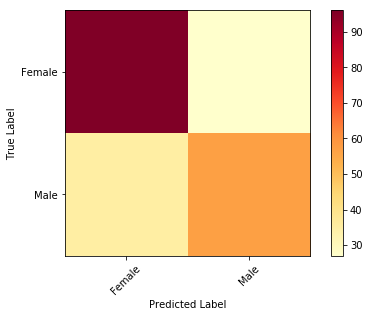

In [92]:
from sklearn.metrics import confusion_matrix
%matplotlib inline
cm = confusion_matrix(y_test, Z)
print(cm)

plot_confusion_matrix(cm, ["Female", "Male"])

(96+57)/(96+57+27+35)